# RideReport Data

Version | Date | Author | Notes |
:------:|:---:|:-------:|:-----:|
1.0 |10 July 2022 | Ken Dizon - CDOT OIM | Initial version
1.1 |27 October 2022 | Ken Dizon - CDOT OIM | Revised input methods
2.0 |4 April 2023 | Ken Dizon - CDOT OIM | Cleaner code and outputs

**Objective**
Utilize RideReport service (https://www.ridereport.com/) to access scooter (mircomobility) data in Denver to produce GHG analysis. 

### Content

- Packages
1. Data Context
2. Data: Collection & Import
    * 2.1 Report
    * 2.2 Analyze
3. Data Cleaning
4. Timeline Subset
    - 4.1 Weekly
    - 4.2 Monthly
    - 4.3 Yearly
5.  GHG Analysis
    * 5.1 Monthly
    * 5.2 Yearly
6. Data Visualization
7. Report

In [1]:
# Load Packages need to run script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

# Makes graphics look better
sns.set() 

import warnings
warnings.filterwarnings("ignore")

##  1. Data Context

In [2]:
context = pd.read_csv('RideReport_Data/metric_definitions.csv')
context

,Metric Name,Scope,Definition,Purpose
0,Max Available,Service Area,The maximum number of vehicles concurrently av...,Describes the most vehicles available for rent...
1,Max Unavailable,Service Area,The maximum number of vehicles concurrently un...,Describes the highest number of vehicles in th...
2,Max Parked,Service Area,The maximum number of concurrent stopped vehic...,Describes the highest number of vehicles in th...
3,Trip Start Count,Service Area,The total number of trips that started in the ...,NaN
4,Trip End Count,Service Area,The total number of trips that ended in the se...,NaN
5,Trips Per Vehicle,Service Area,Trip Starts divided by the Max Available for t...,Describes how many trips an average vehicle wo...
6,Trip Start Count,Area of Interest,The total number of trips that started in the ...,NaN
7,Trip End Count,Area of Interest,The total number of trips that ended in the ar...,Describes the number of trips that ended in a ...
8,Morning Deployment Available Count,Area of Interest,The number of available vehicles at 8AM.,Describes approximately how many vehicles were...
9,Mean Available Vehicle Count,Area of Interest,The average number of vehicles in an available...,Reflects the average number of vehicles availa...


## 2. Data - Collection & Import
- 2.1 Report Data
- 2.2 Analyze Data

### 2.1 Report Data
**Important:** As the file size was to large the data for the year had to split by the months of 1-6 and 7-12. This data was exported from the report tab between January 1st - December 31st. 

In [3]:
# Import Data

# Areas of interest
ai1 = pd.read_csv('RideReport_Data2022/areas_of_interest_2022-01-01_-_2022-06-30(CONFIDENTIAL).csv')
ai2 = pd.read_csv('RideReport_Data2022/areas_of_interest_2022-07-01_-_2022-12-31(CONFIDENTIAL).csv')                   

# hourly deployments
hd1 = pd.read_csv('RideReport_Data2022/hourly_deployments_2022-01-01_-_2022-06-30(CONFIDENTIAL).csv')
hd2 = pd.read_csv('RideReport_Data2022/hourly_deployments_2022-07-01_-_2022-12-31(CONFIDENTIAL).csv')

# service area
sa1 = pd.read_csv('RideReport_Data2022/service_area_2022-01-01_-_2022-06-30(CONFIDENTIAL).csv')
sa2 = pd.read_csv('RideReport_Data2022/service_area_2022-07-01_-_2022-12-31(CONFIDENTIAL).csv')

# Combine first and second
ai_df = pd.concat([ai1, ai2])
hd_df = pd.concat([hd1, hd2])
sa_df = pd.concat([sa1, sa2])

**Raw Data preview**

In [4]:
print('areas of interest'), 
display(ai_df.head())
display(ai_df.shape)

areas of interest


,Operator,Date,Area,Vehicle Type,Trip Start Count,Trip End Count,Morning Deployment Available Count,Mean Available Vehicle Count,Mean Unavailable Vehicle Count,Mean Active Vehicle Count,Vehicle Utilization By Mean Available Vehicles,Vehicle Utilization By Mean Active Vehicles,Average Vehicle Idle Seconds,Total Vehicles Seen
0,Lime,2022-01-01,2401 Colfax Mobility Hub,e-bike,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN,0
1,Lime,2022-01-01,Civic Center Station Mobility Hub,e-bike,0,0,0,0.00,0.00,0.00,NaN,NaN,NaN,0
2,Lime,2022-01-01,Opportunity Areas (4/13/21),e-bike,0,0,168,167.32,6.83,167.32,0.0,0.0,85983.81,175
3,Lime,2022-01-01,15th St for 2023 TIP,e-bike,0,0,26,25.99,3.00,25.99,0.0,0.0,86378.00,29
4,Lime,2022-01-01,Coor's Field,e-bike,0,0,12,12.00,0.00,12.00,0.0,0.0,86378.00,12


(64490, 14)

In [5]:
print('hourly deployments')
display(hd_df.head())
display(hd_df.shape)

hourly deployments


,Operator,Date,Area,Vehicle Type,Hour of Day,Available Count,Unavailable Count,Parked Count
0,Lime,2022-01-01,15th St for 2023 TIP,e-bike,0,26,3,29
1,Lime,2022-01-01,15th St for 2023 TIP,e-bike,1,26,3,29
2,Lime,2022-01-01,15th St for 2023 TIP,e-bike,2,26,3,29
3,Lime,2022-01-01,15th St for 2023 TIP,e-bike,3,26,3,29
4,Lime,2022-01-01,15th St for 2023 TIP,e-bike,4,26,3,29


(1612250, 8)

In [6]:
print('service area')
display(sa_df.head())
display(sa_df.shape)

service area


,Operator,Date,Vehicle Type,Max Available,Max Unavailable,Max Parked,Trip Start Count,Trip End Count,Trips Per Vehicle
0,Lime,2022-01-01,e-bike,465,26,486,0,0,0.0
1,Lime,2022-01-01,scooter,1270,459,1722,0,0,0.0
2,Lime,2022-01-01,all,1734,477,2205,0,0,0.0
3,Lyft,2022-01-01,e-bike,200,111,245,0,0,0.0
4,Lyft,2022-01-01,scooter,654,57,678,0,0,0.0


(2235, 9)

### 2.2 Analyze Data
**Important:** This data is exported from the Analyze tab between January 1st - December 31st. Selection of all service areas in Denver for scooters and computed by end trips. 

In [7]:
### Import Data

#Trips by date
date_df = pd.read_csv('RideReport_Data2022/2022-01-01--2022-12-31-analyze-trips_by_date.csv')
# Total trip distance
dday_df = pd.read_csv('RideReport_Data2022/2022-01-01--2022-12-31-analyze-total_trip_distance_by_day.csv')
# Trips by distance
dist_df = pd.read_csv('RideReport_Data2022/2022-01-01--2022-12-31-analyze-trip_distance.csv')
# Trips by duration
dura_df = pd.read_csv('RideReport_Data2022/2022-01-01--2022-12-31-analyze-trip_duration.csv')
# Trips by hour
hour_df = pd.read_csv('RideReport_Data2022/2022-01-01--2022-12-31-analyze-trips_by_hour.csv')

**Raw Data preview**

In [8]:
# Analyze Data

print('trips_by_date')
display(date_df.head())
display(date_df.shape)

print('distance by day')
display(dday_df.head())
display(dday_df.shape)

print('trip distance')
display(dist_df.head())
display(dist_df.shape)

print('trip duration')
display(dura_df.head())
display(dura_df.shape)

print('trips_by_hour')
display(hour_df.head())
display(hour_df.shape)

trips_by_date


,Date,Trips By Date | Ends | Scooters
0,2022-01-01,0
1,2022-01-02,392
2,2022-01-03,1357
3,2022-01-04,2360
4,2022-01-05,1326


(365, 2)

distance by day


,Date,Total Trip Distance | Ends | Scooters
0,2022-01-01,0
1,2022-01-02,255
2,2022-01-03,1226
3,2022-01-04,2158
4,2022-01-05,1100


(365, 2)

trip distance


,Miles,Trip Distance | Ends | Scooters
0,<0,0
1,0-0.5,1190990
2,0.5-1,1269978
3,1-1.5,792780
4,1.5-2,447083


(12, 2)

trip duration


,Minutes,Trip Duration | Ends | Scooters
0,<0,241
1,0-5,1315108
2,5-10,1444589
3,10-15,715714
4,15-20,354390


(11, 2)

trips_by_hour


,Hour,Trips By Hour | Ends | Scooters
0,0,135028
1,1,91693
2,2,58860
3,3,23886
4,4,19976


(24, 2)

_____ 

## 3. Data Cleaning

In [9]:
# Set all dataframe that have [Date] column into datetime format
ai_df['Date'] = pd.to_datetime(ai_df['Date'])
hd_df['Date'] = pd.to_datetime(hd_df['Date'])
sa_df['Date'] = pd.to_datetime(sa_df['Date'])
date_df['Date'] = pd.to_datetime(date_df['Date'])
dday_df['Date'] = pd.to_datetime(dday_df['Date'])

In [10]:
# Serive area data prep

# filtering the rows where Vehicle Type is 'scooter'
sa_df = sa_df[sa_df['Vehicle Type'].str.contains('scooter')]
# Remove Operator TNCs
sa_df = sa_df.drop(columns=['Operator'])

# Set column to datatime
sa_df['Date'] = pd.to_datetime(sa_df['Date'])
# Group by date
sa_df = sa_df.groupby(by="Date")["Max Available", "Trip Start Count",].sum().reset_index()
# Trips per Vehicle
sa_df['Trips Per Vehicle'] = (sa_df['Trip Start Count'] / sa_df['Max Available']).round(2)

print('Preped Service Area')
sa_df.head()

Preped Service Area


,Date,Max Available,Trip Start Count,Trips Per Vehicle
0,2022-01-01,1924,0,0.00
1,2022-01-02,1850,392,0.21
2,2022-01-03,2072,1357,0.65
3,2022-01-04,2080,2359,1.13
4,2022-01-05,2193,1326,0.60


**MicroMobility**

In [11]:
# Combine dataframes: Service area + distance by day

# mm = micromobility
mm_df = pd.merge(sa_df, dday_df)

# Rename Column
mm_df = mm_df.rename(columns={"Total Trip Distance | Ends | Scooters": "Total Trip Distance"})

# Distance per-Veh
mm_df['Distance Per Vehicle'] = (mm_df['Total Trip Distance'] / mm_df['Trip Start Count']).round(2)

# Nan values to 0 for entire dataframe
mm_df = mm_df.fillna(0)
mm_df.head()

,Date,Max Available,Trip Start Count,Trips Per Vehicle,Total Trip Distance,Distance Per Vehicle
0,2022-01-01,1924,0,0.00,0,0.00
1,2022-01-02,1850,392,0.21,255,0.65
2,2022-01-03,2072,1357,0.65,1226,0.90
3,2022-01-04,2080,2359,1.13,2158,0.91
4,2022-01-05,2193,1326,0.60,1100,0.83


In [12]:
# Days 
first_date = mm_df['Date'].iloc[0]
last_date = mm_df['Date'].iloc[-1]

day_count = last_date - first_date
print('Day Count:', day_count.days)
print(mm_df.shape)

# Number of days data was accured
num_days = mm_df.shape[0]

Day Count: 364
(365, 6)


## 4.Timeline Subset

#### Weekly | Monthly | Yearly

In [13]:
mm_df.columns

Index(['Date', 'Max Available', 'Trip Start Count', 'Trips Per Vehicle',
       'Total Trip Distance', 'Distance Per Vehicle'],
      dtype='object')

### 4.1 Daily/Weekly

In [14]:
D_df = mm_df

# Year, Month, Date 
D_df['Year'] = D_df['Date'].dt.year
D_df['Month'] = D_df['Date'].dt.month
# shift column 'Year' to first position
first_column = D_df.pop('Year')
second_column = D_df.pop('Month')
# insert column using insert(position,column_name,
# first_column) function
D_df.insert(0, 'Year', first_column)
D_df.insert(1, 'Month', second_column)


# Determine day of week
D_df["DayOfWeek"] = D_df["Date"].dt.weekday
# check if the date is weekend or not
D_df["IsWeekend"] = D_df["DayOfWeek"] >= 5

# Day of week change 
# Prior 6 == Sunday 
# New (Mon = 1 | Sun = 7)
D_df['DayOfWeek'] = D_df['DayOfWeek'].replace({0: 1,
                                                       1: 2, 
                                                       2: 3,
                                                       3: 4,
                                                       4: 5,
                                                       5: 6,
                                                       6: 7,})

D_df.tail(3)

,Year,Month,Date,Max Available,Trip Start Count,Trips Per Vehicle,Total Trip Distance,Distance Per Vehicle,DayOfWeek,IsWeekend
362,2022,12,2022-12-29,4463,666,0.15,536,0.80,4,False
363,2022,12,2022-12-30,4415,1595,0.36,1362,0.85,5,False
364,2022,12,2022-12-31,4436,3169,0.71,2698,0.85,6,True


###  4.2 Monthly

In [15]:
cols = mm_df[['Date', 'Max Available', 'Trip Start Count','Total Trip Distance']]

### Monthly comp ###
M_df = cols.groupby(pd.Grouper(key='Date', axis=1, 
                      freq='M')).sum().reset_index()

# Year, Month, Date 
M_df['Year'] = M_df['Date'].dt.year
M_df['Month'] = M_df['Date'].dt.month
M_df['Days in Month'] = M_df['Date'].dt.day

# shift column 'Year' to first position
first_column = M_df.pop('Year')
second_column = M_df.pop('Month')
third_column = M_df.pop('Days in Month')

# insert column using insert(position,column_name,
# first_column) function
M_df.insert(0, 'Year', first_column)
M_df.insert(1, 'Month', second_column)
M_df.insert(2, 'Days in Month', third_column)

# drop date
M_df = M_df.drop(['Date'], axis=1)

### Metrics ###
    # Per Vehicle
M_df['Trips Per Vehicle'] = (M_df['Trip Start Count'] / M_df['Max Available']).round(2)
M_df['Distance Per Vehicle'] = (M_df['Total Trip Distance'] / M_df['Trip Start Count']).round(2)
    # Per Day
M_df['Avg Trips Per Month'] = (M_df['Trip Start Count'] / M_df['Days in Month']).round(0)
M_df['Avg Distance Per Month'] = (M_df['Total Trip Distance'] / M_df['Days in Month']).round(0)

M_df

,Year,Month,Days in Month,Max Available,Trip Start Count,Total Trip Distance,Trips Per Vehicle,Distance Per Vehicle,Avg Trips Per Month,Avg Distance Per Month
0,2022,1,31,85773,121240,112997,1.41,0.93,3911.0,3645.0
1,2022,2,28,91811,129210,125238,1.41,0.97,4615.0,4473.0
2,2022,3,31,124277,277428,301785,2.23,1.09,8949.0,9735.0
3,2022,4,30,129239,442241,496878,3.42,1.12,14741.0,16563.0
4,2022,5,31,130485,466024,543848,3.57,1.17,15033.0,17543.0
5,2022,6,30,112250,567467,706160,5.06,1.24,18916.0,23539.0
6,2022,7,31,116027,540796,681329,4.66,1.26,17445.0,21978.0
7,2022,8,31,127068,517468,641394,4.07,1.24,16693.0,20690.0
8,2022,9,30,139815,513796,604371,3.67,1.18,17127.0,20146.0
9,2022,10,31,141158,441033,495038,3.12,1.12,14227.0,15969.0


### 4.3 Yearly/Annual

In [16]:
Y_df = M_df.groupby(by="Year")["Max Available","Trip Start Count","Total Trip Distance"].sum().reset_index()

### Metrics ###
    # Per Vehicle
Y_df['Avg Trips Per Vehicle'] = (Y_df['Trip Start Count'] / M_df['Max Available'].median()).round(2)
Y_df['Avg Distance Per Vehicle'] = (Y_df['Total Trip Distance'] / M_df['Trip Start Count'].sum()).round(2)
    # Per Day
Y_df['Avg Trips Per Day'] = (Y_df['Trip Start Count'] / num_days).round(0)
Y_df['Avg Total Distance Per Day'] = (Y_df['Total Trip Distance'] / num_days).round(0)

Y_df

,Year,Max Available,Trip Start Count,Total Trip Distance,Avg Trips Per Vehicle,Avg Distance Per Vehicle,Avg Trips Per Day,Avg Total Distance Per Day
0,2022,1476995,4414428,5087174,34.45,1.15,12094.0,13937.0


__________
## 5. GHG Analysis

#### What are my calculations going to be? 

n-Rides * 365/n days (days in a year/days in calc) * n1 (miles/trip) * n2 (percent trips
replacing driving) * n3 (tonnes CO2 per auto mile traveled) / n4 scooters used
= Y (tCO2 per scooter)

- Taken from City of Milwaukee
https://learn.sharedusemobilitycenter.org/wp-content/uploads/Shared-Mobility-Benefits-Calculator-Method.pdf

### Assumptions

**Important** 
- The calculation is measured in US tonnes = 2,000/lbs
- British ton = 2240 lbs
- Metric ton is 1000kg == 2204 lbs

In [17]:
# scooter trips replaced a trip in an automobile
per_trip_replacing_driving = 0.37

# tonnes CO2 per auto mile traveled
# The average passenger vehicle emits about 404 grams of CO2 per mile 
## https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle
co2_auto_mile = 0.000404

### Equation ###
# n1 = total rides
# n2 = 365/n days observed
# n3 = miles/trip
# n4 = percent trips replacing driving
# n5 = tonnes CO2 per auto mile traveled / scooters deployed

#### Monthly Dashboard

In [18]:
m1 = M_df['Trip Start Count'] 
m2 = 365/M_df['Days in Month']
m3 = M_df['Total Trip Distance']/M_df['Trip Start Count']
m4 = per_trip_replacing_driving
m5 = co2_auto_mile / M_df['Max Available']
M_GHG = m1 * m2 * m3 * m4 * m5

# Tonnes to pounds
M_df['GHG per scooter (lbs)'] = (M_GHG * 2000).round(2)
M_df['GHG total(lbs)'] = ((M_GHG * M_df['Max Available']) * 2000).round(2)
M_df['GHG total(T)'] = M_GHG

# drop Days in Month. Combine the Y%m%
M_df = M_df.drop(['Days in Month'], axis=1)
M_df['Date'] = pd.to_datetime(M_df['Year'].astype(str) + '-' + M_df['Month'].astype(str), format='%Y-%m')
M_df.drop(['Year', 'Month'], axis=1, inplace=True)
cols = M_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
M_df = M_df[cols]

M_df

,Date,Max Available,Trip Start Count,Total Trip Distance,Trips Per Vehicle,Distance Per Vehicle,Avg Trips Per Month,Avg Distance Per Month,GHG per scooter (lbs),GHG total(lbs),GHG total(T)
0,2022-01-01,85773,121240,112997,1.41,0.93,3911.0,3645.0,4.64,397750.90,0.002319
1,2022-02-01,91811,129210,125238,1.41,0.97,4615.0,4473.0,5.32,488072.17,0.002658
2,2022-03-01,124277,277428,301785,2.23,1.09,8949.0,9735.0,8.55,1062287.09,0.004274
3,2022-04-01,129239,442241,496878,3.42,1.12,14741.0,16563.0,13.98,1807317.54,0.006992
4,2022-05-01,130485,466024,543848,3.57,1.17,15033.0,17543.0,14.67,1914351.98,0.007336
5,2022-06-01,112250,567467,706160,5.06,1.24,18916.0,23539.0,22.88,2568548.72,0.011441
6,2022-07-01,116027,540796,681329,4.66,1.26,17445.0,21978.0,20.67,2398286.87,0.010335
7,2022-08-01,127068,517468,641394,4.07,1.24,16693.0,20690.0,17.77,2257715.16,0.008884
8,2022-09-01,139815,513796,604371,3.67,1.18,17127.0,20146.0,15.72,2198306.84,0.007861
9,2022-10-01,141158,441033,495038,3.12,1.12,14227.0,15969.0,12.34,1742540.15,0.006172


#### Yearly Dashboard

In [19]:
y1 = Y_df['Trip Start Count'] 
y2 = 365/num_days
y3 = Y_df['Total Trip Distance']/M_df['Trip Start Count']
y4 = per_trip_replacing_driving
y5 = co2_auto_mile / Y_df['Max Available']
Y_GHG = y1 * y2 * y3 * y4 * y5

# Tonnes to pounds
Y_df['GHG per scooter (lbs)'] = (Y_GHG * 2000).round(2)
Y_df['GHG total(lbs)'] = (Y_GHG * M_df['Max Available']).round(2)
Y_df['GHG total(T)'] = Y_GHG
Y_df

,Year,Max Available,Trip Start Count,Total Trip Distance,Avg Trips Per Vehicle,Avg Distance Per Vehicle,Avg Trips Per Day,Avg Total Distance Per Day,GHG per scooter (lbs),GHG total(lbs),GHG total(T)
0,2022,1476995,4414428,5087174,34.45,1.15,12094.0,13937.0,37.49,1607.9,0.018746


## 6. Data Visualization

GHG Monthly

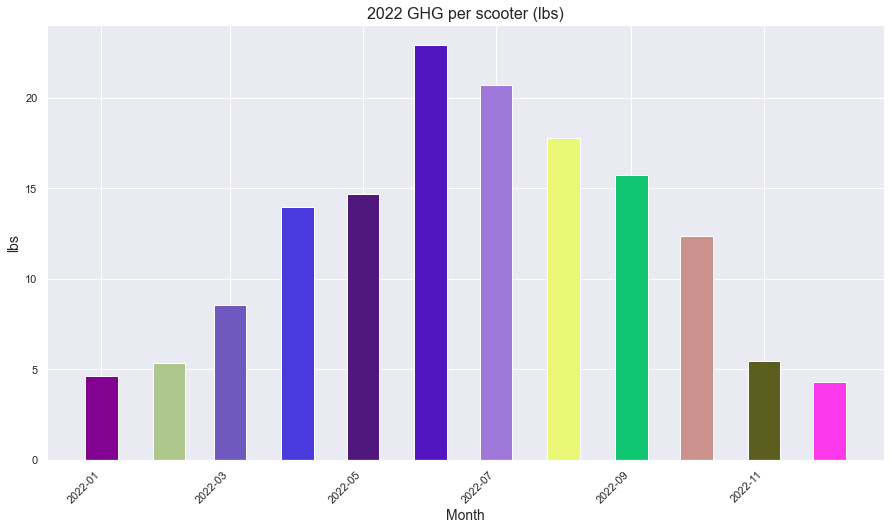

In [20]:
# Generate random colors
colors = np.random.rand(len(M_df))

# Create bar chart
plt.figure(figsize=(15, 8))  # Set figure size
plt.bar(M_df['Date'], M_df['GHG per scooter (lbs)'],
        width=15,
        color=[np.random.rand(3,) for _ in range(len(M_df))]) 

plt.xlabel('Month', fontsize=14)  
plt.ylabel('lbs', fontsize=14) 
plt.title('2022 GHG per scooter (lbs)', fontsize=16)  
plt.xticks(rotation=45, ha='right')
plt.show()

Scooter Distribution

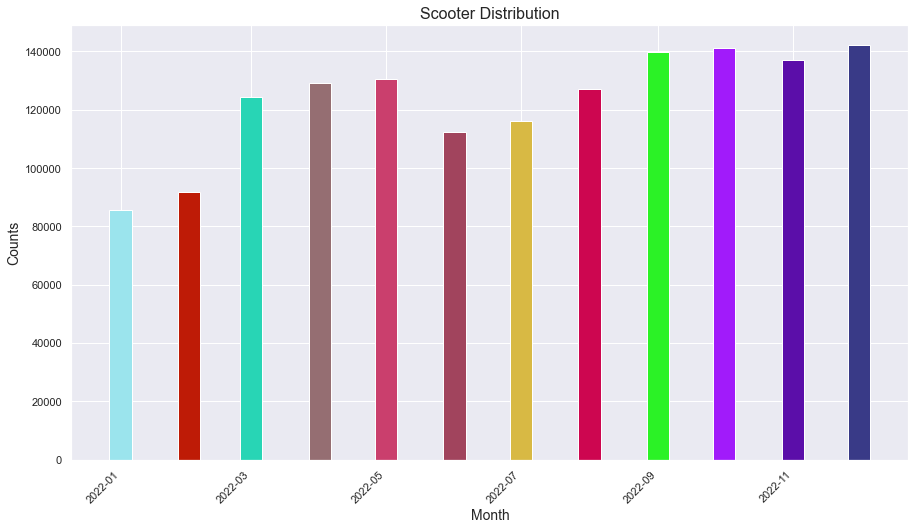

In [21]:
# Generate random colors
colors = np.random.rand(len(M_df))

# Create bar chart
plt.figure(figsize=(15, 8))  # Set figure size
plt.bar(M_df['Date'], M_df['Max Available'],
        width=10,
        color=[np.random.rand(3,) for _ in range(len(M_df))]) 

plt.xlabel('Month', fontsize=14)  
plt.ylabel('Counts', fontsize=14) 
plt.title('Scooter Distribution', fontsize=16)  
plt.xticks(rotation=45, ha='right')
plt.show()

## 7. Report

Each bar displays the GHG emissions (lbs) per scooter for each month. The Summer months of June and July are greatest values. Probably causes are due to ridership increase in the warmer months and deployments. 

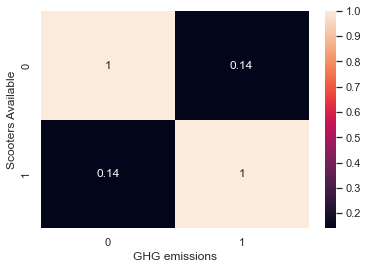

<Figure size 576x432 with 0 Axes>

In [22]:
# Correlations relating to GHG per scooter


corr = M_df['GHG per scooter (lbs)'].corr(M_df['Max Available'])
sns.heatmap([[1, corr], [corr, 1]], annot=True)


plt.xlabel('GHG emissions')
plt.ylabel('Scooters Available')
plt.figure(figsize=(8, 6))
plt.show()

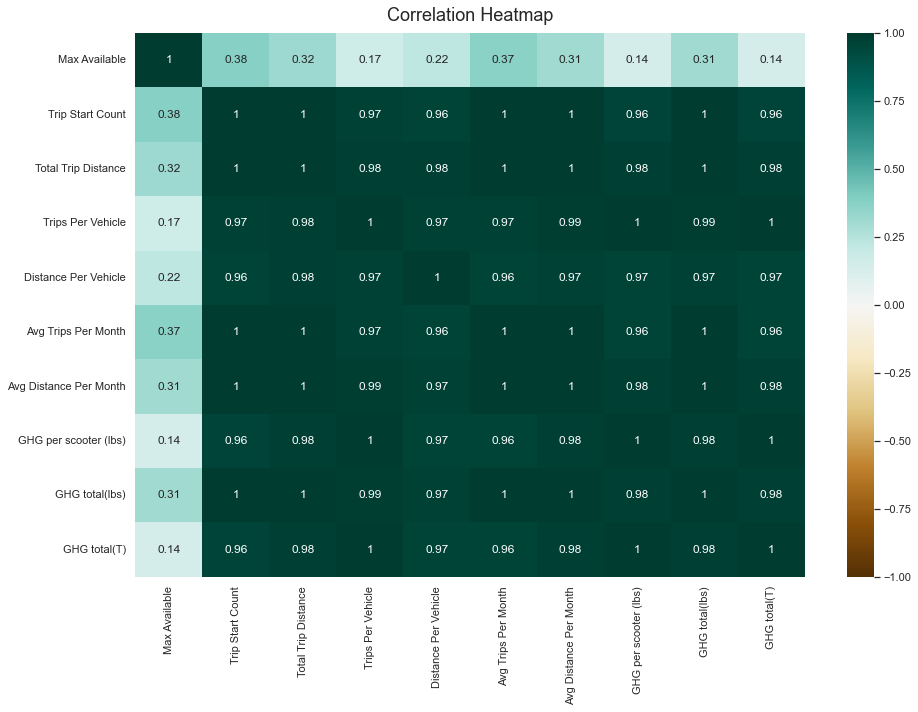

In [23]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(M_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [24]:
corr_matrix = M_df.corr()
print(corr_matrix['GHG per scooter (lbs)'][['Max Available', 'Trip Start Count', 'Total Trip Distance']])

Max Available          0.139753
Trip Start Count       0.960189
Total Trip Distance    0.977183
Name: GHG per scooter (lbs), dtype: float64


It shows that the more available scooters does not lead to GHG reduction. Julys deployments was the third lowest however, was the highest GHG per scooter. More data for weather may be overlapped to show this trend for easier days of ridership. What would be interesting is the area in which receive the most demand by using the areas of interest (ai) dataframe. 